# Diagnosing Heart Disease

Classifying the data on whether the patients do or do not have heart disease based on the features provided

## Importing the libraries

In [1]:
import os
import shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Importing the Data

In [2]:
os.chdir('..')

In [3]:
DATA_PATH = os.getcwd() + '//'
fname = 'heart.csv'

In [4]:
heart_df = pd.read_csv(DATA_PATH + fname, header = 'infer')
heart_df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


## EDA and Pre-processing

In [5]:
heart_df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [6]:
heart_df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

No need for one hot encoding as all features are numeric and there is no class imbalance in the dataset either.

In [7]:
X = heart_df.iloc[:, :-1].values
y = heart_df.iloc[:, -1].values

### Train-Test split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.25, random_state = 0)

In [9]:
print(X_train.shape)

(227, 13)


In [10]:
print(y_train.shape)

(227,)


### Feature Scaling

In [11]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [12]:
print(X_train.shape)

(227, 13)


In [13]:
print(X_test.shape)

(76, 13)


## Fitting the Logistic Regression Model

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
log_reg = LogisticRegression(random_state=0)
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [16]:
y_pred = log_reg.predict(X_test)
y_pred

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1], dtype=int64)

In [17]:
y_test

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1], dtype=int64)

In [21]:
predicted_probabilities = log_reg.predict_proba(X_test)
predicted_probabilities[:, 0] ## Probability of having target == 1

array([0.96421264, 0.18275371, 0.18628997, 0.98171588, 0.88161474,
       0.62175492, 0.93007085, 0.8983798 , 0.99539398, 0.9973351 ,
       0.23811539, 0.05102972, 0.96900145, 0.16573527, 0.02367772,
       0.29251417, 0.9399618 , 0.29168973, 0.9928445 , 0.23051943,
       0.19848869, 0.70503447, 0.90928497, 0.86383735, 0.12133091,
       0.33338128, 0.82277567, 0.65926282, 0.0130256 , 0.31824645,
       0.34059078, 0.98642957, 0.0259959 , 0.28452412, 0.07192915,
       0.28488405, 0.96251271, 0.17367932, 0.93801427, 0.83069983,
       0.23053145, 0.1555511 , 0.55976191, 0.92885554, 0.41191672,
       0.27133453, 0.184322  , 0.37398749, 0.95316301, 0.20809383,
       0.1648613 , 0.28410807, 0.0193818 , 0.12200191, 0.00316855,
       0.89352266, 0.03297507, 0.05051844, 0.24435403, 0.03309795,
       0.18826604, 0.00915757, 0.05277915, 0.10518082, 0.17127118,
       0.31578266, 0.15255197, 0.83102021, 0.26789161, 0.43925217,
       0.58784332, 0.05174483, 0.17020864, 0.96456181, 0.90644

In [22]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_curve, auc
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
print("CONFUSION MATRIX \n", cm)
acc = accuracy_score(y_test, y_pred)
print("ACCURACY :", round(acc, 2))
precision = precision_score(y_test, y_pred)
print("PRECISION :", round(precision, 2))
recall = recall_score(y_test, y_pred)
print("RECALL :", round(recall, 2))
fpr, tpr, thresh = roc_curve(y_test, y_pred)
auc_score = auc(fpr, tpr)
print("AUC : ", round(auc_score, 2))

CONFUSION MATRIX 
 [[24  9]
 [ 4 39]]
ACCURACY : 0.83
PRECISION : 0.81
RECALL : 0.91
AUC :  0.82


Our logistic regression model, performs quite well on this test dataset. As we are diagnosing heart disease, it is critically important to reduce False Negatives (i.e. Predicting an absence of the disease when in reality there is heart disease) => we must **maximize** recall.

Text(0.5, 1.0, 'ROC-CURVE & AREA UNDER CURVE')

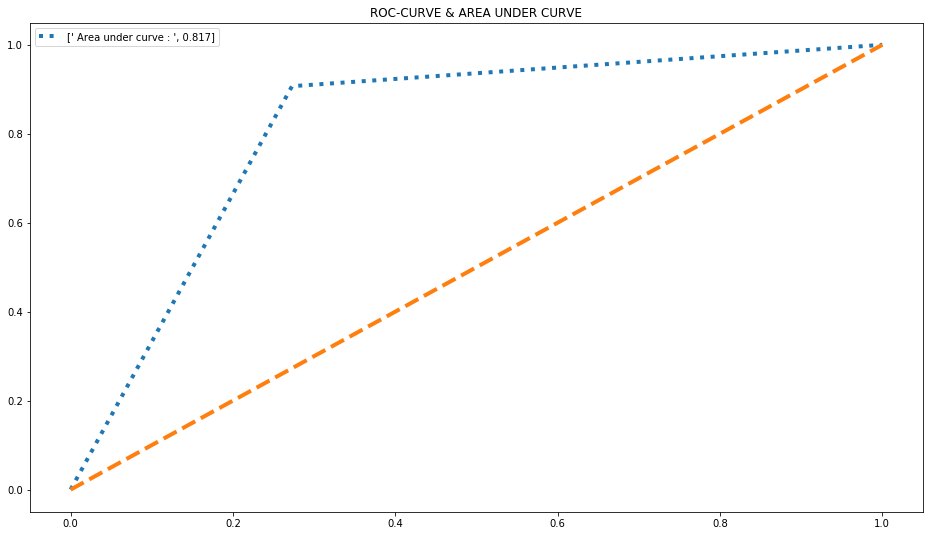

In [23]:
fig = plt.figure(figsize=(16, 9))
ax  = fig.add_subplot(111)
ax.plot(fpr, tpr, label = [" Area under curve : ", round(auc_score, 3)], linewidth = 4, linestyle = "dotted")
ax.plot([0,1],[0,1],linewidth = 4, linestyle = "dashed")
plt.legend(loc = "best")
plt.title("ROC-CURVE & AREA UNDER CURVE")